In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sb

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [ ]:
dataset = datasets.load_breast_cancer()

In [ ]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
dataset['data'][100],dataset['target'][100]

(array([1.361e+01, 2.498e+01, 8.805e+01, 5.827e+02, 9.488e-02, 8.511e-02,
        8.625e-02, 4.489e-02, 1.609e-01, 5.871e-02, 4.565e-01, 1.290e+00,
        2.861e+00, 4.314e+01, 5.872e-03, 1.488e-02, 2.647e-02, 9.921e-03,
        1.465e-02, 2.355e-03, 1.699e+01, 3.527e+01, 1.086e+02, 9.065e+02,
        1.265e-01, 1.943e-01, 3.169e-01, 1.184e-01, 2.651e-01, 7.397e-02]), 0)

In [ ]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X , Y = dataset['data'],dataset['target']

In [ ]:
X[500],Y[500]

(array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
        7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
        2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
        1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
        1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02]), 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None)
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalech','exang','oldpeak','slope','ca','thal','hd']
df_nomissing = df.loc[(df['ca']!='?')&(df['thal'] != '?')]
X = df_nomissing.drop('hd',axis=1)
y = df_nomissing['hd']
y[y>1] = 1

<ipython-input-13-d3092c2cc0b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1] = 1
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
X = X.astype(float)
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal','ca'])
X_encoded

,age,sex,restbp,chol,fbs,thalech,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,0,1,0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,1,0,0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0,0,...,0,1,0,0,0,1,1,0,0,0
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1,0,...,0,1,0,0,0,1,1,0,0,0
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,0,0,...,0,1,0,0,0,1,0,0,1,0
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.to_numpy(), y.to_numpy(), test_size=0.2, random_state=69)

In [ ]:
X_train

array([[ 50.,   1., 129., ...,   0.,   0.,   0.],
       [ 41.,   0., 126., ...,   0.,   0.,   0.],
       [ 39.,   0.,  94., ...,   0.,   0.,   0.],
       ...,
       [ 61.,   1., 120., ...,   1.,   0.,   0.],
       [ 58.,   1., 128., ...,   0.,   1.,   0.],
       [ 60.,   1., 130., ...,   1.,   0.,   0.]])

In [ ]:
y_train

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

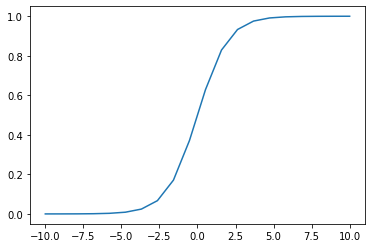

In [ ]:
plt.plot(np.linspace(-10,10,20),sigmoid(np.linspace(-10,10,20)))
plt.show()

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\ln\left(y\_pred^{ (i)}\right) + (1-y^{(i)})\ln\left(1- y\_pred^{ (i)}\right) \large{)} $$

In [ ]:
def LogisticRegressions(X,Y,x,y,lr = 1e-4 , n = 1000,*,gramma = 0.9,verbose=10,momentum = False,predict = False):
  if verbose < 0: verbose =n
  m , dim = X.shape
  w = np.zeros((dim,1))
  log = {'epochs':[],'acc_train':[],'acc_test':[]}
  b = 0
  vw = 0
  vb = 0
  for i in range(n):
    z = np.dot(w.T,X.T) + b
    y_pred = sigmoid(z)
    cost = np.sum(((- np.log(y_pred))*Y + (-np.log(1-y_pred))*(1-Y)))/m
    dw = (np.dot(X.T,(y_pred-Y).T))/m
    db =(np.sum((y_pred-Y)))/m
    if momentum:
      vw = (gramma)*vw + lr*dw
      vb = (gramma)*vb + lr*db
      w = w - vw
      b = b - vb
    else:
      w = w - lr*dw
      b = b - lr*db
    if (i+1) % (n // verbose) == 0 or (i+1) == 1 or (i+1) == n:
      ans = np.round(y_pred)
      acc = np.mean(ans == Y)
      z = np.dot(w.T,x.T) +b
      test_pred = sigmoid(z)
      ans = np.round(test_pred)
      print(f'epoch {i+1:^4} : accuracy_train = {acc*100:.3f} %    accuracy_test = {np.mean(ans == y)*100:.3f} %   loss = {cost:.10f}')
      log['acc_train'].append(acc*100)
      log['acc_test'].append(np.mean(ans == y)*100)
      log['epochs'].append(i+1)
  return (w,b,log)


In [ ]:
class LogisticRegression:
    def __init__(self, lr=1e-4, n=1000, gramma=0.9, verbose=10, momentum=False):
        self.lr = lr
        self.n = n
        self.gramma = gramma
        self.verbose = verbose
        self.momentum = momentum
        self.w = None
        self.b = None
        self.log = None
    
    def fit(self, X, Y,*,random_state= 42,test_size=0.2):
        X, x, Y, y = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        if self.verbose < 0:
            self.verbose = self.n
        m, dim = X.shape
        self.w = np.zeros((dim, 1))
        self.b = 0
        vw = 0
        vb = 0
        self.log = {'epochs': [], 'acc_train': [], 'acc_test': []}
        for i in range(self.n):
            z = np.dot(self.w.T, X.T) + self.b
            y_pred = sigmoid(z)
            cost_train = np.sum(((- np.log(y_pred))*Y + (-np.log(1-y_pred))*(1-Y)))/m
            dw = (np.dot(X.T, (y_pred-Y).T))/m
            db = (np.sum((y_pred-Y)))/m
            if self.momentum:
                vw = (self.gramma)*vw + self.lr*dw
                vb = (self.gramma)*vb + self.lr*db
                self.w = self.w - vw
                self.b = self.b - vb
            else:
                self.w = self.w - self.lr*dw
                self.b = self.b - self.lr*db
            if (i+1) % (self.n // self.verbose) == 0 or (i+1) == 1 or (i+1) == self.n:
                ans = np.round(y_pred)
                acc_train = np.mean(ans == Y)
                self.log['acc_train'].append(acc_train*100)
                self.log['epochs'].append(i+1)
                
                z = np.dot(self.w.T, x.T) + self.b
                test_pred = sigmoid(z)
                ans = np.round(test_pred)
                acc_test = np.mean(ans == y)
                self.log['acc_test'].append(acc_test*100)         
                print(f'epoch {i+1:^4} : accuracy_train = {acc_train*100:.3f} %    accuracy_test = {acc_test*100:.3f} %   loss_train = {cost_train:.10f}')
        return (w,b,log)
    
    def predict(self, x):
        z = np.dot(self.w.T, x.T) + self.b
        test_pred = sigmoid(z)
        ans = np.round(test_pred)
        return ans


In [ ]:
np.round([0.51,0.5,0.1,0.8])

array([1., 0., 0., 1.])

In [ ]:
w,b,log = LogisticRegressions(X_train,y_train,X_test,y_test,lr = 2e-5 , n = 15000 ,gramma=0.999,verbose = 20, momentum = True)

epoch  1   : accuracy_train = 50.211 %    accuracy_test = 73.333 %   loss = 0.6931471806
epoch 750  : accuracy_train = 82.278 %    accuracy_test = 81.667 %   loss = 0.4104329879
epoch 1500 : accuracy_train = 85.232 %    accuracy_test = 85.000 %   loss = 0.3497348501
epoch 2250 : accuracy_train = 86.076 %    accuracy_test = 83.333 %   loss = 0.3331038132
epoch 3000 : accuracy_train = 88.186 %    accuracy_test = 81.667 %   loss = 0.3215591665
epoch 3750 : accuracy_train = 87.764 %    accuracy_test = 81.667 %   loss = 0.3162739361
epoch 4500 : accuracy_train = 87.342 %    accuracy_test = 83.333 %   loss = 0.3114222962
epoch 5250 : accuracy_train = 86.920 %    accuracy_test = 81.667 %   loss = 0.3077714844
epoch 6000 : accuracy_train = 87.764 %    accuracy_test = 80.000 %   loss = 0.3058993955
epoch 6750 : accuracy_train = 87.764 %    accuracy_test = 78.333 %   loss = 0.3047714818
epoch 7500 : accuracy_train = 87.764 %    accuracy_test = 78.333 %   loss = 0.3039638175
epoch 8250 : accuracy

In [ ]:
model = LogisticRegression(lr = 2e-5 , n = 100000 ,gramma=0.999,verbose = 50, momentum = True)
w,b,log = model.fit(X_train,y_train,random_state= 10,test_size=0.2)

epoch  1   : accuracy_train = 38.462 %    accuracy_test = 31.868 %   loss_train = 0.6931471806


<ipython-input-22-30aa1bb70e44>:25: RuntimeWarning: divide by zero encountered in log
  cost_train = np.sum(((- np.log(y_pred))*Y + (-np.log(1-y_pred))*(1-Y)))/m
<ipython-input-22-30aa1bb70e44>:25: RuntimeWarning: invalid value encountered in multiply
  cost_train = np.sum(((- np.log(y_pred))*Y + (-np.log(1-y_pred))*(1-Y)))/m
<ipython-input-19-bb43d9876711>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch 2000 : accuracy_train = 90.659 %    accuracy_test = 90.110 %   loss_train = nan
epoch 4000 : accuracy_train = 90.659 %    accuracy_test = 91.209 %   loss_train = 0.4622051039
epoch 6000 : accuracy_train = 94.505 %    accuracy_test = 91.209 %   loss_train = 0.2335563897
epoch 8000 : accuracy_train = 95.879 %    accuracy_test = 95.604 %   loss_train = 0.0996441845
epoch 10000 : accuracy_train = 96.429 %    accuracy_test = 93.407 %   loss_train = 0.0871147651
epoch 12000 : accuracy_train = 95.879 %    accuracy_test = 94.505 %   loss_train = 0.0818056419
epoch 14000 : accuracy_train = 96.154 %    accuracy_test = 94.505 %   loss_train = 0.0789886754
epoch 16000 : accuracy_train = 96.154 %    accuracy_test = 94.505 %   loss_train = 0.0768320214
epoch 18000 : accuracy_train = 96.429 %    accuracy_test = 94.505 %   loss_train = 0.0749483058
epoch 20000 : accuracy_train = 96.429 %    accuracy_test = 94.505 %   loss_train = 0.0732603586
epoch 22000 : accuracy_train = 96.429 %    accuracy_t

In [ ]:
X_train

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(log['epochs'],log['acc_train'])
plt.plot(log['epochs'],log['acc_test'],'orange')
plt.legend(['train','test'])
plt.xlabel("Epoch")
plt.ylabel('Accuracy %')
plt.show()

In [ ]:
(sum(model.predict(X)[0] == Y)/len(Y))*100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0,15,1000)
y1 = np.random.normal(0,15,1000)
x2 = np.random.normal(0,15,1000)+100
y2 = np.random.normal(0,15,1000)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

In [ ]:
data0 = list(zip(x1,y1))
data1 = list(zip(x2,y2))

In [ ]:
dataset = data0+data1
labels = [0]*len(data0)+[1]*len(data1)

In [ ]:
datasets = [dataset,labels]
# datasets

In [ ]:
X,Y = datasets

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

In [ ]:
X, Y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=2)

In [ ]:
import pandas as pd
import seaborn as sns
X_df = pd.DataFrame(X, columns=['x1','x2'])
y_df = pd.DataFrame(Y, columns=["class"])
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
sns.scatterplot(x="x1", y="x2", hue='class', data=data)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape

In [ ]:
w,b,log = LogisticRegressions(X_train,y_train,X_test,y_test,lr = 2e-3 , n = 3000 , momentum = True,gramma = 0.9)
print(w,b)

In [ ]:
def predict(x,w,b):
  return np.round(sigmoid(np.dot(w.T,x.T) +b))

In [ ]:
yhat

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
# generate dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
y = Y
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
# model = LogisticRegression()
# fit the model
# model.fit(X, y)
# make predictions for the grid
yhat = predict(grid,w,b)
# yhat = y

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

NameError: ignored